## 3. Model Development

<h4>Let's load the modules for linear regression:</h4>


In [2]:
import pandas as pd
import numpy as np

In [3]:
path = ".\\data\\auto.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
from sklearn.linear_model import LinearRegression

### a) Linear regression

Create the linear regression object :

In [5]:
lm = LinearRegression()
lm

LinearRegression()

<h4>Let's check "How could "highway-mpg" help us predict car price?"</h4>


In [6]:
X = df[['highway-mpg']]
Y = df['price']

# Fit the linear model using highway-mpg:
lm.fit(X,Y)

Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
# Intercept Value
lm.intercept_

38423.3058581574

In [8]:
# slope value
lm.coef_

array([-821.73337832])

### Result :

Plugging in the actual values we get:

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>

Let's train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [9]:
x=df[['engine-size']]
y=df[["price"]]

lm.fit(x,y)
lm

LinearRegression()

In [10]:
# Intercept:
lm.intercept_

array([-7963.33890628])

In [11]:
# slope :
lm.coef_

array([[166.86001569]])

### Result :

Plugging in the actual values we get:

<b>Price</b> = -7963.33890628 - 166.86001569 x <b>highway-mpg</b>

### b) Multiple Linear Regression :

Now we know that following are the good pridictor of price
1. Horsepower
2. Curb-weight
3. Engine-size
4. Highway-mpg

In [12]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [13]:
lm.fit(Z, df['price'])

LinearRegression()

In [14]:
# Intercept 
lm.intercept_

-15806.624626329227

In [15]:
# slope
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### Result :
we got this polynonial

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

<h2>4. Model Evaluation Using Visualization</h2>


In [18]:
# import the visualization package: seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48162.12220372147)

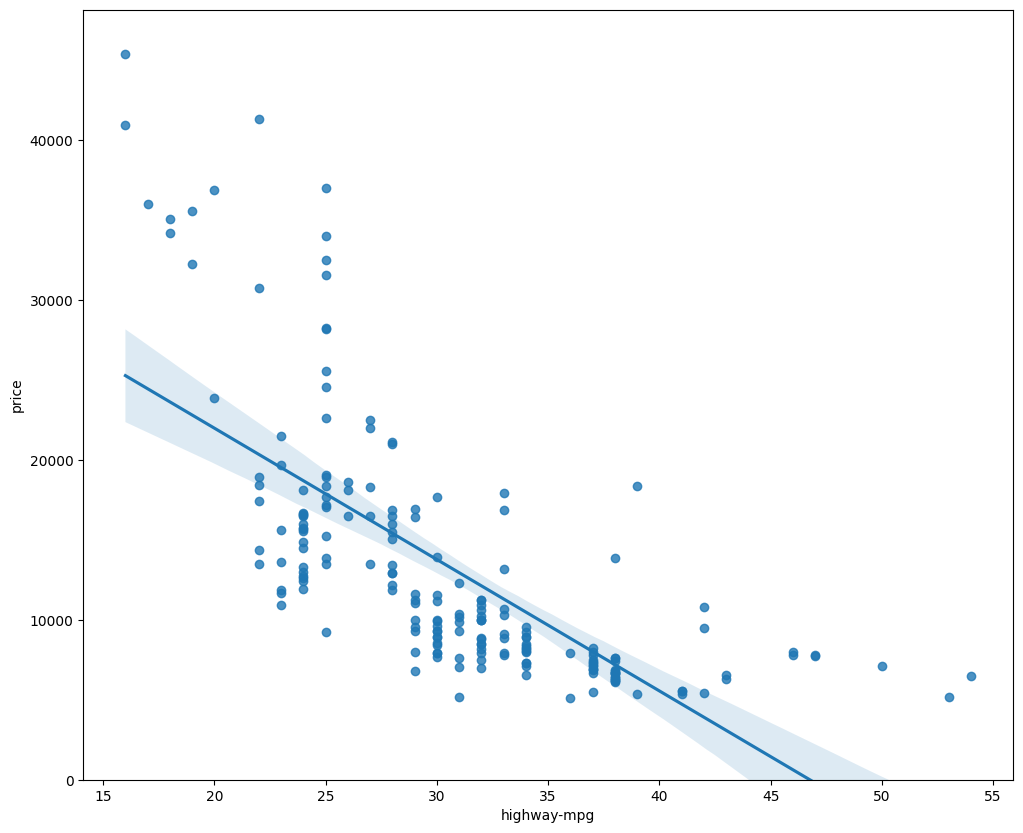

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


In [20]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:
df[["peak-rpm", "highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot

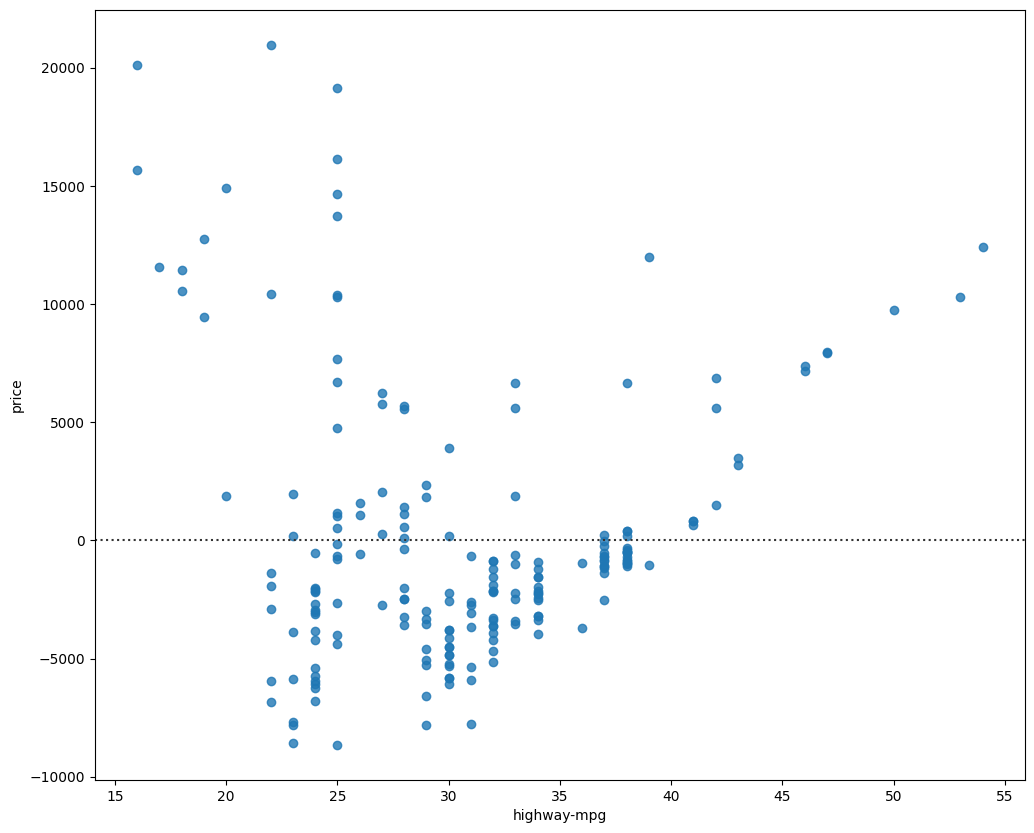

In [21]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

<i>Observation :</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>

<h3>Multiple Linear Regression</h3>


In [22]:
Y_hat = lm.predict(Z)

C:\Users\Deepraj Arya\AppData\Local\Temp\ipykernel_11672\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Deepraj Arya\AppData\Local\Temp\ipykernel_11672\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

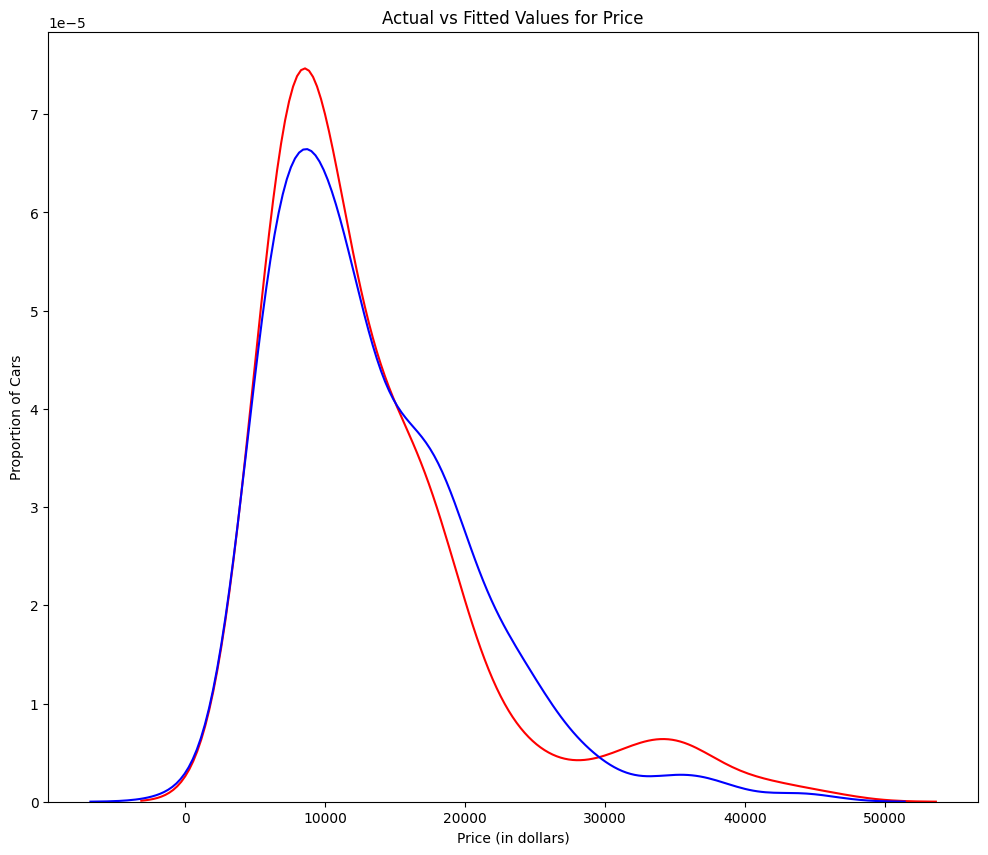

In [23]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<i>Observation : </i>
<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

### Polynomial Regression


In [24]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [25]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [26]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


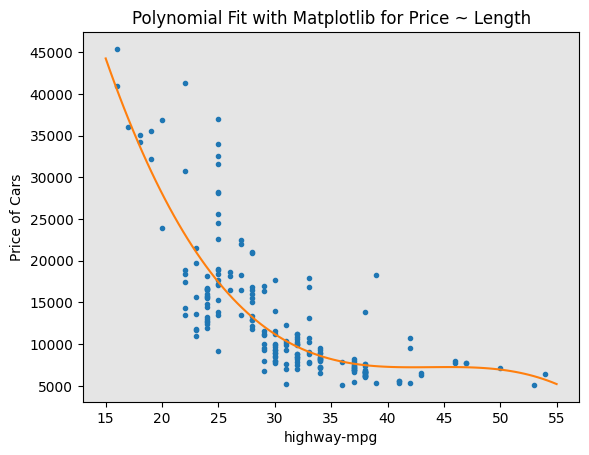

In [27]:
PlotPolly(p, x, y, 'highway-mpg')

In [28]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<i>Observation : </i>
<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


<h2>5. Measures for In-Sample Evaluation</h2>


<h3>Model 1: Simple Linear Regression</h3>

Let's calculate the R^2:


In [29]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


<i>Observation : </i>

We can say that \~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


<h3>Model 2: Multiple Linear Regression</h3>

Let's calculate the R^2:


In [30]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


<i>Observation : </i>

We can say that \~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2.


In [31]:
from sklearn.metrics import r2_score

In [32]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


<i>Observation : </i>

We can say that \~67.419 % of the variation of price is explained by this polynomial fit.


<h2>6. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [33]:
# create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [34]:
# Fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [35]:
# Lets preduce the prediction :
yhat=lm.predict(new_input)
yhat[0:5]

c:\1_Projects\E2E_AutomobilePricePrediction\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

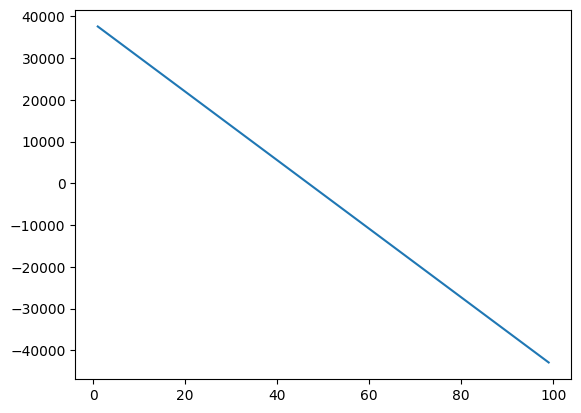

In [36]:
# Plot the data

plt.plot(new_input, yhat)
plt.show()

<h2>Conclusion</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
